# Proyecto 3 Hiperparametrización con Optuna en modelos de aprendizaje profundo

## 1. Introducción a optuna y configuración inicial:

a. Estudiar los fundamentos y características de Optuna, incluyendo su arquitectura y
métodos de optimización. \\
b. Preparar un entorno de desarrollo en PyTorch y configurar Optuna para integrarse con
modelos de aprendizaje profundo.

------------

### Introducción

La búsqueda de hiperparámetros forma parte de casi todos los proyectos de aprendizaje automático y aprendizaje profundo. Cuando seleccionamos un modelo candidato, nos aseguramos de que generalize a los datos de prueba de la mejor manera posible.

Seleccionar manualmente los mejores hiperparámetros es fácil si se trata de un modelo sencillo como la regresión lineal. Para modelos complejos como las redes neuronales, el ajuste manual es difícil.

Por ejemplo, si entrenamos una red neuronal con sólo capas lineales, aquí tenemos un conjunto potencial de hiperparámetros:

- Número de capas
- Unidades por capa
- Función de activación
- Tasa de aprendizaje
- etc.

A menudo, para optimizar los hiperparámetros se utilizan métodos Grid Search y Random Search.

Por ejemplo, digamos que tenemos 3 valores candidatos para cada una de esas 4 variables, acabamos con 3^4 = 81 experimentos. Para redes más grandes y más valores candidatos, este número se vuelve abrumador.

Estos dos enfoques consumen mucho tiempo y recursos. Los algoritmos de aprendizaje profundo actuales a menudo contienen muchos hiperparámetros, y se tarda días, semanas en entrenar un buen modelo. Simplemente no es posible forzar сombinaciones de hiperparámetros y entrenar modelos separados para cada uno sin ninguna optimización.

### Optuna

Para esto se creo **Optuna**, que es una biblioteca de Python utilizada para la optimización de hiperparámetros.

**Optuna combina mecanismos de muestreo (sampling) y poda (pruning) para proporcionar una optimización eficiente de los hiperparámetros.**

Optuna utiliza el muestreo para explorar el espacio de búsqueda de hiperparámetros. Sugiere nuevos valores de hiperparámetros basándose en ensayos anteriores y en el algoritmo de optimización utilizado. Ofrece distintas estrategias de muestreo:

- Grid Search implementado en [GridSampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.GridSampler.html#optuna.samplers.GridSampler)
- Random Search implementado en [RandomSampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.RandomSampler.html#optuna.samplers.RandomSampler)
- Tree-structured Parzen Estimator algorithm implementado en [TPESampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.TPESampler.html#optuna.samplers.TPESampler)
- CMA-ES based algorithm implementado en [CmaEsSampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.CmaEsSampler.html#optuna.samplers.CmaEsSampler)
- Algoritmo para activar parámetros fijos parciales implementado en [PartialFixedSampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.PartialFixedSampler.html#optuna.samplers.PartialFixedSampler)
- Non-dominated Sorting Genetic Algorithm implementado en [NSGAIISampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.NSGAIISampler.html#optuna.samplers.NSGAIISampler)
- uasi Monte Carlo sampling algorithm implementado en [QMCSampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.QMCSampler.html#optuna.samplers.QMCSampler)


Tambien proporciona mecanismos para detener y podar tempranamente ensayos poco prometedores. Supervisa continuamente el progreso de las pruebas y elimina aquellas que probablemente no produzcan mejores resultados, ahorrando tiempo y recursos computacionales. Las decisiones de poda se toman con base en los resultados intermedios informados por la función objetivo durante la evaluación de un ensayo.

### Características principales de Optuna:

Según los [autores de Optuna](https://optuna.org/), son tres las características que la hacen destacar:
- Eager search spaces: Automated search for optimal hyperparameters using Python conditionals, loops, and syntax
- State-of-the-art algorithms: Efficiently search large spaces and prune unpromising trials for faster results
- Easy parallelization: Parallelize hyperparameter searches over multiple threads or processes without modifying code

### Flujo de trabajo

El flujo de trabajo de Optuna se resuelve en torno a dos términos:

1. Ensayo (Trial): Una única llamada a una función objetivo.
2. Estudio (Study): Optimización de hiperparámetros basada en una función objetivo. Un estudio tiene como objetivo determinar el conjunto ideal de valores de hiperparámetros mediante la realización de varios ensayos.

### Integración de Optuna y PyTorch

Ahora, vamos a desglosar el proceso de optimización de hiperparámetros con Optuna.

In [2]:
pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:010m
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install optuna

  Using cached optuna-3.6.1-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.13.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached numpy-2.0.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached SQLAlchemy-2.0.31-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 728.0 kB/s eta 0:00:00MB/s eta 0:00:01
  Using cached Mako-1.3.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached greenlet-3.0.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (3.8 kB)
Using cached optuna-3.6.1-py3-none-any.whl (380 kB)
Using cached alembic-1.13.1-py3-none-any.whl (233 kB)
Using cached SQLAlchemy-2.0.31-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
Using cached colorlog-6.8.2-py3-none-any.whl (11 k

In [2]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 7.8 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━

In [4]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 906.0 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 13.1 MB/s eta 0:00:00 eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.2 MB/s eta 0:00:009.2 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import optuna
import os
import time
import copy

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt

## 2. Optimización de un modelo de clasificación de imágenes:

a. Implementar un modelo convencional como ResNet o VGG en PyTorch. \\
b. Utilizar Optuna para optimizar hiperparámetros como tasa de aprendizaje, tamaño de lote, y configuraciones específicas de capas. \\
c. Evaluar las mejoras en precisión y tiempo de entrenamiento tras la optimización de hiperparámetros

El modelo SimpleVGG define capas convolucionales seguidas de capas de pooling y capas completamente conectadas para la clasificación. La función objetivo (objective) carga un subconjunto del conjunto de datos CIFAR10, define hiperparámetros a optimizar con Optuna, entrena el modelo y evalúa su precisión en un conjunto de prueba más pequeño. Optuna se utiliza para encontrar los mejores hiperparámetros en un número limitado de pruebas (n_trials).

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import optuna

# Modelo VGG
class SimpleVGG(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleVGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Definimos la función objetivo para optimizar con Optuna
def objective(trial):
    # Cargamos un subconjunto del dataset CIFAR10
    transform = transforms.ToTensor()
    cifar10_train = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform) # download=True
    cifar10_test = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)

    # Usamos un subconjunto más pequeño del dataset
    small_train, _ = torch.utils.data.random_split(cifar10_train, [2000, len(cifar10_train) - 2000])
    small_test, _ = torch.utils.data.random_split(cifar10_test, [500, len(cifar10_test) - 500])

    trainloader = torch.utils.data.DataLoader(small_train, batch_size=64, shuffle=True)
    testloader = torch.utils.data.DataLoader(small_test, batch_size=64, shuffle=False)

    # Definimos los hiperparámetros a optimizar
    lr = trial.suggest_float("lr", 1e-4, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-1, log=True)
    momentum = trial.suggest_float("momentum", 0.0, 1.0)

    # Definimos el modelo, el optimizador y la función de pérdida
    model = SimpleVGG(num_classes=10)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    loss_fn = nn.CrossEntropyLoss()

    # Entrenamos el modelo por una época
    model.train()
    for data, target in trainloader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

    # Evaluamos el modelo en el conjunto de prueba
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculamos la precisión en el conjunto de prueba y devolverla como el valor objetivo para Optuna
    accuracy = correct / len(testloader.dataset)
    return accuracy

# Ejecutamos el estudio de Optuna para optimizar los hiperparámetros
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # Número reducido de pruebas por simplicidad

# Imprimimos los mejores hiperparámetros y el mejor valor objetivo encontrado por Optuna
print("🎉🎉🎉")
print("Mejores hiperparámetros: {}".format(study.best_params))
print("Mejor valor objetivo: {}".format(study.best_value))


[I 2024-06-20 07:01:28,335] A new study created in memory with name: no-name-c5cb197f-cc90-4c1b-965c-48768eb6ad3e
[I 2024-06-20 07:01:29,995] Trial 0 finished with value: 0.124 and parameters: {'lr': 0.0013185037936517044, 'weight_decay': 1.0101876084844885e-05, 'momentum': 0.31937225365824595}. Best is trial 0 with value: 0.124.
[I 2024-06-20 07:01:31,628] Trial 1 finished with value: 0.112 and parameters: {'lr': 0.0069775700774503385, 'weight_decay': 1.7158918060121343e-05, 'momentum': 0.777572700493663}. Best is trial 0 with value: 0.124.
[I 2024-06-20 07:01:33,215] Trial 2 finished with value: 0.114 and parameters: {'lr': 0.000603989798307354, 'weight_decay': 0.0003455069810528488, 'momentum': 0.9677030275876205}. Best is trial 0 with value: 0.124.
[I 2024-06-20 07:01:34,810] Trial 3 finished with value: 0.094 and parameters: {'lr': 0.00013414570624012488, 'weight_decay': 0.017267488501468326, 'momentum': 0.9522947167311789}. Best is trial 0 with value: 0.124.
[I 2024-06-20 07:01:3

🎉🎉🎉
Mejores hiperparámetros: {'lr': 0.08899241419385215, 'weight_decay': 0.0024542995513446913, 'momentum': 0.4625382849823203}
Mejor valor objetivo: 0.144


Los resultados que estamos obteniendo son un poco bajos para el conjunto de datos CIFAR-10, aunque se debe considerar que hemos reducido significativamente la complejidad del modelo y el tamaño del subconjunto de datos.

Ahora modificaremos el codigo un poco, el cual incrementa el número de épocas y usa un subconjunto de datos más grande:

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import optuna

# Definimos un modelo VGG simplificado
class SimpleVGG(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleVGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Definimos la función objetivo para optimizar con Optuna
def objective(trial):
    # Cargamos un subconjunto del dataset CIFAR10
    transform = transforms.ToTensor()
    cifar10_train = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
    cifar10_test = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)

    # Usamos un subconjunto más pequeño del dataset
    small_train, _ = torch.utils.data.random_split(cifar10_train, [5000, len(cifar10_train) - 5000])
    small_test, _ = torch.utils.data.random_split(cifar10_test, [1000, len(cifar10_test) - 1000])

    trainloader = torch.utils.data.DataLoader(small_train, batch_size=64, shuffle=True)
    testloader = torch.utils.data.DataLoader(small_test, batch_size=64, shuffle=False)

    # Definimos los hiperparámetros a optimizar
    lr = trial.suggest_float("lr", 1e-4, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-1, log=True)
    momentum = trial.suggest_float("momentum", 0.0, 1.0)

    # Definimos el modelo, el optimizador y la función de pérdida
    model = SimpleVGG(num_classes=10)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    loss_fn = nn.CrossEntropyLoss()

    # Entrenamos el modelo por 5 épocas
    model.train()
    for epoch in range(5):  # Incrementa el número de épocas
        for data, target in trainloader:
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()

    # Evaluamos el modelo en el conjunto de prueba
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculamos la precisión en el conjunto de prueba y devolverla como el valor objetivo para Optuna
    accuracy = correct / len(testloader.dataset)
    return accuracy

# Ejecutamos el estudio de Optuna para optimizar los hiperparámetros
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # Número reducido de pruebas por simplicidad

# Imprimimos los mejores hiperparámetros y el mejor valor objetivo encontrado por Optuna
print("Mejores hiperparámetros: {}".format(study.best_params))
print("Mejor valor objetivo: {}".format(study.best_value))

[I 2024-06-20 07:02:40,477] A new study created in memory with name: no-name-f314dfe2-7380-41db-b47b-6540247e8175
[I 2024-06-20 07:02:53,819] Trial 0 finished with value: 0.198 and parameters: {'lr': 0.00845991323388558, 'weight_decay': 4.05249623080612e-05, 'momentum': 0.21636263055137983}. Best is trial 0 with value: 0.198.
[I 2024-06-20 07:03:06,944] Trial 1 finished with value: 0.185 and parameters: {'lr': 0.04328877533411029, 'weight_decay': 0.0032581492626639567, 'momentum': 0.1560813751939938}. Best is trial 0 with value: 0.198.
[I 2024-06-20 07:03:20,391] Trial 2 finished with value: 0.263 and parameters: {'lr': 0.018164393518388437, 'weight_decay': 0.012957315385372072, 'momentum': 0.8973338245769505}. Best is trial 2 with value: 0.263.
[I 2024-06-20 07:03:33,203] Trial 3 finished with value: 0.234 and parameters: {'lr': 0.001902261227532657, 'weight_decay': 0.022056829136624552, 'momentum': 0.9881619924809797}. Best is trial 2 with value: 0.263.
[I 2024-06-20 07:03:46,146] Tr

Mejores hiperparámetros: {'lr': 0.0237744576848544, 'weight_decay': 1.3666934273072666e-05, 'momentum': 0.8165255624909171}
Mejor valor objetivo: 0.398


## 3. Experimentación con modelos secuenciales para NLP:

a. Aplicar Optuna en modelos LSTM o Transformer para tareas como traducción automática o generación de texto. \\
b. Optimizar hiperparámetros como el número de capas, la dimensión de los embeddings y los parámetros específicos de atención. \\
c. Analizar cómo la optimización afecta la calidad del texto generado y la velocidad de convergencia.

In [1]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install -U accelerate 
#pip install -U transformers
#los instale desde la consola

In [4]:
import datasets
import optuna
import os
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
)

# Cargar dataset
dataset = load_dataset("ade_corpus_v2", "Ade_corpus_v2_classification")
dataset = dataset["train"].train_test_split(0.2)

# Definir el nombre del modelo y tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Función de preprocesamiento
def preprocess(examples):
    return tokenizer(
        examples["text"], truncation=True, padding="max_length", max_length=64
    )

# Preprocesar el dataset
dataset = dataset.map(preprocess, batched=True, batch_size=1000)

# Función objetivo para optimización de hiperparámetros
def objective(trial: optuna.Trial):
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    output_dir = os.path.join("ade-test", f"trial_{trial.number}")  # Directorio de salida único para cada ensayo
    os.makedirs(output_dir, exist_ok=True)

    training_args = TrainingArguments(
        output_dir=output_dir,
        learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
        weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),
        num_train_epochs=trial.suggest_int("num_train_epochs", low=2, high=5),
        per_device_train_batch_size=16,  # Aumentar tamaño de lote
        per_device_eval_batch_size=16,   # Aumentar tamaño de lote
        evaluation_strategy="epoch",     # Evaluar al final de cada época
        logging_dir=output_dir,         # Guardar logs en el mismo directorio
        logging_steps=100,               # Registrar cada 100 pasos
        disable_tqdm=True,
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset["train"],
        eval_dataset=dataset["test"],
    )
    result = trainer.train()
    return result.training_loss

# Optimizar hiperparámetros
study = optuna.create_study(study_name="hyper-parameter-search", direction="minimize")
study.optimize(func=objective, n_trials=5)  # Reducir el número de trials

print("Mejor valor de pérdida:", study.best_value)
print("Mejores parámetros:", study.best_params)
print("Mejor trial:", study.best_trial)


/home/abraham/miniconda3/envs/jupyter-ipykernel/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|███████████████████████████████████████████████████████████| 23516/23516 [00:00<00:00, 801303.53 examples/s]
/home/abraham/miniconda3/envs/jupyter-ipykernel/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|█████████████████████████████████████████████████████████████████████████████████| 4704/4704 [00:00<00:00, 17729.88 examples/s]
[I 2024-06-20 07:26:59,629] A new study created in memory with name: hyper-parameter-search
Some weights of BertForSequen

{'loss': 0.6208, 'grad_norm': 4.609071254730225, 'learning_rate': 0.00043125496300916487, 'epoch': 0.08503401360544217}
{'loss': 0.6261, 'grad_norm': 0.8630306124687195, 'learning_rate': 0.000412105097866662, 'epoch': 0.17006802721088435}
{'loss': 0.617, 'grad_norm': 0.47822126746177673, 'learning_rate': 0.0003929552327241591, 'epoch': 0.25510204081632654}
{'loss': 0.6055, 'grad_norm': 1.0605601072311401, 'learning_rate': 0.00037380536758165625, 'epoch': 0.3401360544217687}
{'loss': 0.6239, 'grad_norm': 10.253633499145508, 'learning_rate': 0.0003546555024391534, 'epoch': 0.42517006802721086}
{'loss': 0.6232, 'grad_norm': 1.439030408859253, 'learning_rate': 0.0003355056372966505, 'epoch': 0.5102040816326531}


[W 2024-06-20 07:50:13,769] Trial 0 failed with parameters: {'learning_rate': 0.00045040482815166775, 'weight_decay': 0.00025689528868076927, 'num_train_epochs': 2} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/abraham/miniconda3/envs/jupyter-ipykernel/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_1104303/3918511221.py", line 53, in objective
    result = trainer.train()
             ^^^^^^^^^^^^^^^
  File "/home/abraham/miniconda3/envs/jupyter-ipykernel/lib/python3.12/site-packages/transformers/trainer.py", line 1885, in train
    return inner_training_loop(
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/abraham/miniconda3/envs/jupyter-ipykernel/lib/python3.12/site-packages/transformers/trainer.py", line 2216, in _inner_training_loop
    tr_loss_step = self.training_step(model, inputs)
                   ^^

KeyboardInterrupt: 

En esta versión del código, se han realizado varias modificaciones para mejorar la eficiencia y resolver advertencias. Estas incluyen la actualización del método de sugerencia de hiperparámetros suggest_loguniform a suggest_float con log=True, la corrección de evaluation_strategy a eval_strategy, la desactivación de tqdm para reducir el tiempo de registro, y la gestión adecuada de pesos no inicializados. Además, se ha reducido el tamaño del dataset para los ensayos iniciales y se asegura el uso de GPU si está disponible, lo que contribuye a una ejecución más rápida y eficiente.

In [6]:
import datasets
import optuna
import os
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
)
import torch

# Usar GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar dataset
dataset = load_dataset("ade_corpus_v2", "Ade_corpus_v2_classification")
dataset = dataset["train"].train_test_split(0.2)

# Reducir aún más el tamaño del dataset para ensayos iniciales
small_train_dataset = dataset["train"].select(range(500))
small_eval_dataset = dataset["test"].select(range(100))

# Definir el nombre del modelo y tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Función de preprocesamiento
def preprocess(examples):
    return tokenizer(
        examples["text"], truncation=True, padding="max_length", max_length=64
    )

# Preprocesar el dataset
dataset = dataset.map(preprocess, batched=True, batch_size=1000)
small_train_dataset = small_train_dataset.map(preprocess, batched=True, batch_size=1000)
small_eval_dataset = small_eval_dataset.map(preprocess, batched=True, batch_size=1000)

# Función objetivo para optimización de hiperparámetros
def objective(trial: optuna.Trial):
    model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
    output_dir = os.path.join("ade-test", f"trial_{trial.number}")  # Directorio de salida único para cada ensayo
    os.makedirs(output_dir, exist_ok=True)

    training_args = TrainingArguments(
        output_dir=output_dir,
        learning_rate=trial.suggest_float("learning_rate", low=4e-5, high=0.01, log=True),
        weight_decay=trial.suggest_float("weight_decay", low=4e-5, high=0.01, log=True),
        num_train_epochs=trial.suggest_int("num_train_epochs", low=1, high=3),  # Reducir el máximo a 3 épocas
        per_device_train_batch_size=16,  # Aumentar tamaño de lote
        per_device_eval_batch_size=16,   # Aumentar tamaño de lote
        eval_strategy="epoch",           # Evaluar al final de cada época
        logging_dir=output_dir,          # Guardar logs en el mismo directorio
        logging_steps=500,               # Registrar cada 500 pasos
        disable_tqdm=True,
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=small_train_dataset,
        eval_dataset=small_eval_dataset,
    )
    result = trainer.train()
    return result.training_loss

# Optimizar hiperparámetros
study = optuna.create_study(study_name="hyper-parameter-search", direction="minimize")
study.optimize(func=objective, n_trials=3)  # Reducir el número de trials a 3

# Entrenar con el mejor conjunto de hiperparámetros
best_trial = study.best_trial
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
training_args = TrainingArguments(
    output_dir="final-model",
    learning_rate=best_trial.params["learning_rate"],
    weight_decay=best_trial.params["weight_decay"],
    num_train_epochs=best_trial.params["num_train_epochs"],
    per_device_train_batch_size=16,  # Aumentar tamaño de lote
    per_device_eval_batch_size=16,   # Aumentar tamaño de lote
    eval_strategy="epoch",           # Evaluar al final de cada época
    logging_dir="final-model",       # Guardar logs en el mismo directorio
    logging_steps=500,               # Registrar cada 500 pasos
    disable_tqdm=True,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
)
trainer.train()

print("Mejor valor de pérdida:", study.best_value)
print("Mejores parámetros:", study.best_params)
print("Mejor trial:", study.best_trial)


Map: 100%|████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 8745.60 examples/s]
[I 2024-06-20 08:00:15,228] A new study created in memory with name: hyper-parameter-search
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2024-06-20 08:01:19,538] Trial 0 finished with value: 0.6301901340484619 and parameters: {'learning_rate': 0.0013548425105920966, 'weight_decay': 0.000844581377013946, 'num_train_epochs': 1}. Best is trial 0 with value: 0.6301901340484619.


{'eval_loss': 0.724229097366333, 'eval_runtime': 2.8348, 'eval_samples_per_second': 35.276, 'eval_steps_per_second': 2.469, 'epoch': 1.0}
{'train_runtime': 63.5725, 'train_samples_per_second': 7.865, 'train_steps_per_second': 0.503, 'train_loss': 0.6301901340484619, 'epoch': 1.0}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2024-06-20 08:02:23,023] Trial 1 finished with value: 0.760809600353241 and parameters: {'learning_rate': 0.001476016748798422, 'weight_decay': 0.00367499601830561, 'num_train_epochs': 1}. Best is trial 0 with value: 0.6301901340484619.


{'eval_loss': 0.6591594219207764, 'eval_runtime': 2.8204, 'eval_samples_per_second': 35.456, 'eval_steps_per_second': 2.482, 'epoch': 1.0}
{'train_runtime': 62.9091, 'train_samples_per_second': 7.948, 'train_steps_per_second': 0.509, 'train_loss': 0.760809600353241, 'epoch': 1.0}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2024-06-20 08:03:28,469] Trial 2 finished with value: 0.5697887539863586 and parameters: {'learning_rate': 0.00022593811083178214, 'weight_decay': 0.00018438428760538783, 'num_train_epochs': 1}. Best is trial 2 with value: 0.5697887539863586.


{'eval_loss': 0.4735482335090637, 'eval_runtime': 2.8675, 'eval_samples_per_second': 34.874, 'eval_steps_per_second': 2.441, 'epoch': 1.0}
{'train_runtime': 64.712, 'train_samples_per_second': 7.727, 'train_steps_per_second': 0.494, 'train_loss': 0.5697887539863586, 'epoch': 1.0}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'loss': 0.615, 'grad_norm': 0.9341108202934265, 'learning_rate': 0.0001298759888794938, 'epoch': 0.42517006802721086}
{'loss': 0.6097, 'grad_norm': 2.0760040283203125, 'learning_rate': 3.381386692720549e-05, 'epoch': 0.8503401360544217}
{'eval_loss': 0.5997103452682495, 'eval_runtime': 151.5124, 'eval_samples_per_second': 31.047, 'eval_steps_per_second': 1.94, 'epoch': 1.0}
{'train_runtime': 2566.1987, 'train_samples_per_second': 7.331, 'train_steps_per_second': 0.458, 'train_loss': 0.609258729584363, 'epoch': 1.0}
Mejor valor de pérdida: 0.5697887539863586
Mejores parámetros: {'learning_rate': 0.00022593811083178214, 'weight_decay': 0.00018438428760538783, 'num_train_epochs': 1}
Mejor trial: FrozenTrial(number=2, state=1, values=[0.5697887539863586], datetime_start=datetime.datetime(2024, 6, 20, 8, 2, 23, 24407), datetime_complete=datetime.datetime(2024, 6, 20, 8, 3, 28, 469023), params={'learning_rate': 0.00022593811083178214, 'weight_decay': 0.00018438428760538783, 'num_train_epoch

## 4. Desarrollo de un sistema de prunning automático:

a. Implementar y configurar el prunning de ensayos en Optuna para detener automáticamente los ensayos menos prometedores y reducir el tiempo de computación. \\
b. Comparar el rendimiento y la eficiencia del proceso de optimización con y sin prunning.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune

class ModeloPruned(nn.Module):
    def __init__(self):
        super(PrunedModel, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# Example usage
modelo = ModeloPruned()
parametros_a_podar = [(modelo.fc1, 'weight'), (modeloo.fc2, 'weight')]
prune.global_unstructured(
    parametros_a_podar,
    metodo_pruning=prune.L1Unstructured,
    cantidad=0.2
)

## 5. Integración de técnicas de transfer learning:

a. Experimentar con la optimización de modelos preentrenados en tareas específicas, ajustando hiperparámetros para fine-tuning. \\
b. Evaluar la efectividad de Optuna en la selección de hiperparámetros que maximizan el transfer learning.

En este ejemplo práctico de optimización de hiperparámetros, abordaremos un problema de clasificación binaria.

(basado en http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)

Utilizaremos el conjunto de datos Hormigas contra Abejas, que forma parte del conjunto de datos ImageNet. Deberá descargarlo desde aquí: Hormigas contra abejas. Contiene 400 imágenes, ~250 de entrenamiento y ~150 de validación (prueba).

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

In [1]:
import torch
import optuna
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

/home/abraham/miniconda3/envs/jupyter-ipykernel/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

La siguiente función se utilizará para entrenar el modelo:

In [14]:
def train_model(trial, model, criterion, optimizer, num_epochs=5):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train() 
            else:
                model.eval()  

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
        
        trial.report(epoch_acc, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model, best_acc

Para empezar, es fundamental crear la Función Objetivo. Esta función toma una configuración de hiperparámetros y devuelve su puntuación de evaluación (valor objetivo). Optuna resuelve el problema de la optimización de hiperparámetros al maximizar o minimizar esta Función Objetivo.

La Función Objetivo encapsula el proceso estándar de entrenamiento del modelo. Definimos nuestro modelo, configuramos optimizadores y funciones de pérdida, evaluamos métricas, entre otros pasos. En este ejemplo, evaluaremos la métrica de precisión en el conjunto de validación. También devolveremos su valor desde la Función Objetivo para que Optuna lo utilice en la optimización.

Dentro de la Función Objetivo, debemos definir los hiperparámetros que deseamos optimizar. En Optuna, es posible optimizar diferentes tipos de hiperparámetros, como:

- Números reales (floats).
- Números enteros (integers).
- Categóricos discretos.

En nuestro ejemplo, optimizaremos tres hiperparámetros:

- Red preentrenada. Dado que el conjunto de datos de "Hormigas vs. Abejas" es pequeño, utilizaremos transfer learning para obtener un modelo de buena calidad. Hemos elegido una de las redes entrenadas en ImageNet y reemplazamos las últimas capas completamente conectadas responsables de la clasificación.
- Optimizador: SGD, Adam.
- Tasa de aprendizaje: de 1e-4 a 1e-2.

In [15]:
def objetivo(trial):
    
    # Hiperparámetros que queremos optimizar
    params = {
        "model_name": trial.suggest_categorical('model_name',["resnet18", "alexnet", "vgg16"]),
        "lr": trial.suggest_loguniform('lr', 1e-4, 1e-2),
        "optimizer_name": trial.suggest_categorical('optimizer_name',["SGD", "Adam"])
    }
    
    # Obtener el modelo preentrenado
    model = obtener_modelo(params["model_name"])
    model = model.to(device)
    
    # Definir criterio
    criterion = nn.CrossEntropyLoss()
    
    # Configurar optimizador
    optimizer = getattr(
        torch.optim, params["optimizer_name"]
    )(model.parameters(), lr=params["lr"])
    
    # Entrenar el modelo
    best_model, best_acc = train_model(trial, model, criterion, optimizer, num_epochs=5)
    
    # Guardar el mejor modelo para cada prueba
    # torch.save(mejor_modelo.state_dict(), f"modelo_prueba_{prueba.number}.pth")
    
    # Devolver precisión (Valor Objetivo) de la prueba actual
    return best_acc

Nota: Para obtener un modelo preentrenado por su nombre, añadiremos una función get_model:

In [16]:
def obtener_modelo(model_name: str = "resnet18"):  
    if model_name == "resnet18":
        model = models.resnet18(pretrained=True)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, 2)
    elif model_name == "alexnet":
        model = models.alexnet(pretrained=True)
        in_features = model.classifier[1].in_features
        model.classifier = nn.Linear(in_features, 2)
    elif model_name == "vgg16":
        model = models.vgg16(pretrained=True)
        in_features = model.classifier[0].in_features
        model.classifier = nn.Linear(in_features, 2)
    return model

Para empezar a optimizar nuestra Función Objetivo, creamos un nuevo estudio:

In [17]:
# sampler: queremos usar un muestreador TPE
# pruner: utilizamos MedianPruner para interrumpir pruebas poco prometedoras
# direction: la dirección del estudio es "maximizar" porque queremos maximizar la precisión
# n_trials: Número de pruebas

sampler = optuna.samplers.TPESampler()    
study = optuna.create_study(
    sampler=sampler,
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=3, n_warmup_steps=5, interval_steps=3
    ),
    direction='maximize')
study.optimize(func=objetivo, n_trials=3)

[I 2024-06-20 09:24:20,991] A new study created in memory with name: no-name-9d0d4d94-6f95-41df-860a-24a0b5c9dc69


Epoch 0/4
----------


/tmp/ipykernel_1312130/1625103487.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lr": trial.suggest_loguniform('lr', 1e-4, 1e-2),


train Loss: 0.6493 Acc: 0.6393
val Loss: 0.4960 Acc: 0.7843

Epoch 1/4
----------
train Loss: 0.5164 Acc: 0.7582
val Loss: 0.3734 Acc: 0.8693

Epoch 2/4
----------
train Loss: 0.4524 Acc: 0.8033
val Loss: 0.3143 Acc: 0.9150

Epoch 3/4
----------
train Loss: 0.3931 Acc: 0.8484
val Loss: 0.2712 Acc: 0.9020

Epoch 4/4
----------
train Loss: 0.3783 Acc: 0.8197


[I 2024-06-20 09:25:33,401] Trial 0 finished with value: 0.934640522875817 and parameters: {'model_name': 'resnet18', 'lr': 0.0008709086527787754, 'optimizer_name': 'SGD'}. Best is trial 0 with value: 0.934640522875817.


val Loss: 0.2431 Acc: 0.9346

Training complete in 1m 12s
Best val Acc: 0.934641


/home/abraham/miniconda3/envs/jupyter-ipykernel/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/4
----------
train Loss: 790.5330 Acc: 0.4344
val Loss: 8.5681 Acc: 0.4575

Epoch 1/4
----------
train Loss: 1.6542 Acc: 0.5164
val Loss: 0.8113 Acc: 0.5686

Epoch 2/4
----------
train Loss: 0.8495 Acc: 0.4631
val Loss: 0.7626 Acc: 0.5425

Epoch 3/4
----------
train Loss: 0.9628 Acc: 0.4549
val Loss: 0.9402 Acc: 0.4510

Epoch 4/4
----------
train Loss: 21.8259 Acc: 0.4672


[I 2024-06-20 09:32:37,827] Trial 1 finished with value: 0.5686274509803921 and parameters: {'model_name': 'vgg16', 'lr': 0.005366941939750931, 'optimizer_name': 'Adam'}. Best is trial 0 with value: 0.934640522875817.


val Loss: 0.7004 Acc: 0.5425

Training complete in 7m 4s
Best val Acc: 0.568627
Epoch 0/4
----------
train Loss: 0.6187 Acc: 0.6475
val Loss: 0.4011 Acc: 0.8693

Epoch 1/4
----------
train Loss: 0.5138 Acc: 0.7418
val Loss: 0.2897 Acc: 0.9346

Epoch 2/4
----------
train Loss: 0.4449 Acc: 0.7705
val Loss: 0.2511 Acc: 0.9216

Epoch 3/4
----------
train Loss: 0.4241 Acc: 0.7992
val Loss: 0.2305 Acc: 0.9150

Epoch 4/4
----------
train Loss: 0.3511 Acc: 0.8402


[I 2024-06-20 09:34:05,586] Trial 2 finished with value: 0.934640522875817 and parameters: {'model_name': 'resnet18', 'lr': 0.0016671673715747957, 'optimizer_name': 'SGD'}. Best is trial 0 with value: 0.934640522875817.


val Loss: 0.2090 Acc: 0.9346

Training complete in 1m 28s
Best val Acc: 0.934641


In [20]:
best_trial = study.best_trial

print("🎉🎉🎉")
print("Mejor prueba:")
print(f"  Número de prueba: {best_trial.number}")
print(f"  Modelo seleccionado: {best_trial.params['model_name']}")
print(f"  Learning rate (lr): {best_trial.params['lr']}")
print(f"  Optimizador seleccionado: {best_trial.params['optimizer_name']}")
print(f"  Precisión obtenida: {best_trial.value}")
print(f"  Fecha y hora de inicio: {best_trial.datetime_start}")
print(f"  Fecha y hora de finalización: {best_trial.datetime_complete}")
print("  Métricas intermedias:")
for step, value in best_trial.intermediate_values.items():
    print(f"    Paso {step}: {value}")

🎉🎉🎉
Mejor prueba:
  Número de prueba: 0
  Modelo seleccionado: resnet18
  Learning rate (lr): 0.0008709086527787754
  Optimizador seleccionado: SGD
  Precisión obtenida: 0.934640522875817
  Fecha y hora de inicio: 2024-06-20 09:24:20.993162
  Fecha y hora de finalización: 2024-06-20 09:25:33.401369
  Métricas intermedias:
    Paso 0: 0.7843137254901961
    Paso 1: 0.869281045751634
    Paso 2: 0.9150326797385621
    Paso 3: 0.9019607843137255
    Paso 4: 0.934640522875817


## 6. Análisis de sensibilidad y robustez:

a. Realizar un análisis de sensibilidad para identificar qué hiperparámetros son más influyentes en el rendimiento del modelo. \\
b. Investigar la robustez de los modelos optimizados en condiciones de variación de datos, como ruido o cambios en la distribución de los datos.

In [33]:
import plotly
plotly.__version__

'5.22.0'

In [22]:
import pickle

# Guardar el estudio actual en un archivo
with open('study.pkl', 'wb') as f:
    pickle.dump(study, f)

In [1]:
import pickle

# Para cargar el estudio después de reiniciar el kernel
with open('study.pkl', 'rb') as f:
    study = pickle.load(f)

/home/abraham/miniconda3/envs/jupyter-ipykernel/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import optuna
optuna.visualization.plot_parallel_coordinate(study).show(renderer="browser")

Opening in existing browser session.


/tmp/ipykernel_1386379/437109074.py:1: ExperimentalWarning:

plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Parallel Coordinate Plot'}>

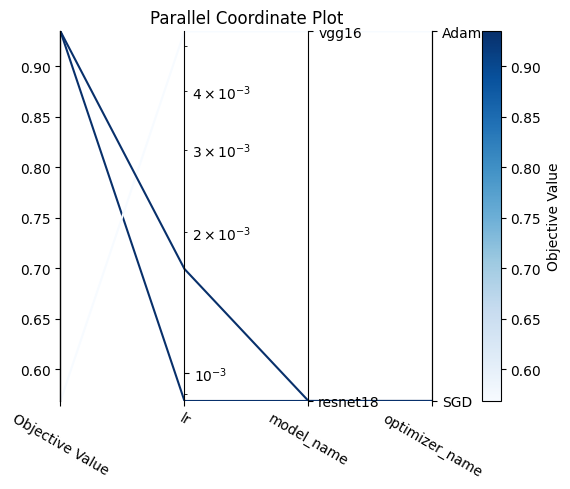

In [14]:
optuna.visualization.matplotlib.plot_parallel_coordinate(study)

In [16]:
optuna.visualization.plot_contour(study, params=['optimizer_name','model_name']).show(renderer="browser")

Opening in existing browser session.


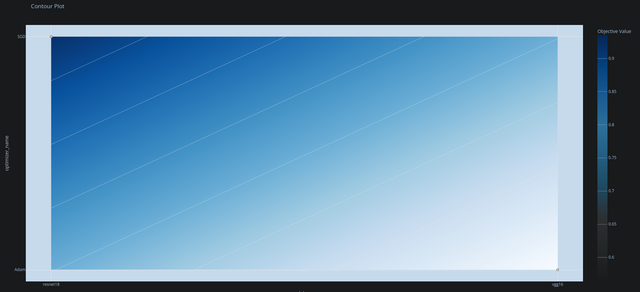

In [10]:
from IPython import display
display.Image("https://i.ibb.co/56X2BYB/download2.png")

In [11]:
#optuna.visualization.matplotlib.plot_contour(study, params=['optimizer_name','model_name'])

Gráficos de cortes para cada uno de los hiperparámetros:

/tmp/ipykernel_1386379/2375574420.py:1: ExperimentalWarning:

plot_slice is experimental (supported from v2.2.0). The interface can change in the future.



array([<Axes: xlabel='lr', ylabel='Objective Value'>,
       <Axes: xlabel='model_name'>, <Axes: xlabel='optimizer_name'>],
      dtype=object)

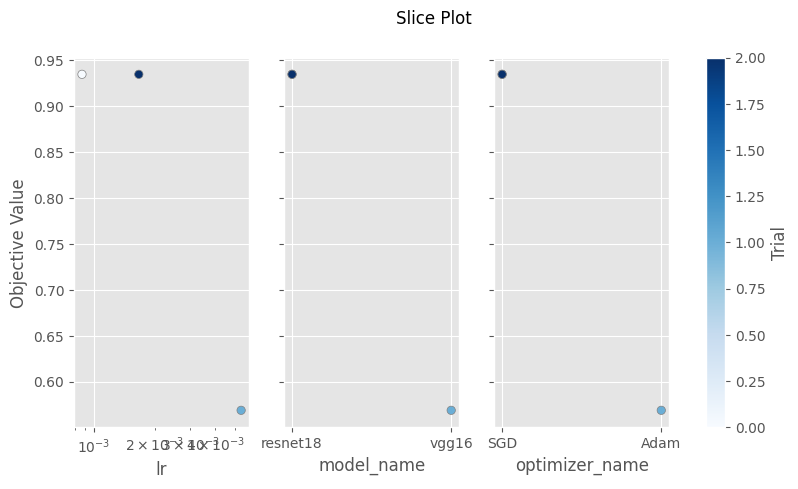

In [20]:
optuna.visualization.matplotlib.plot_slice(study)

Importancia de los hiperparámetros:

/tmp/ipykernel_1420446/1785110159.py:3: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

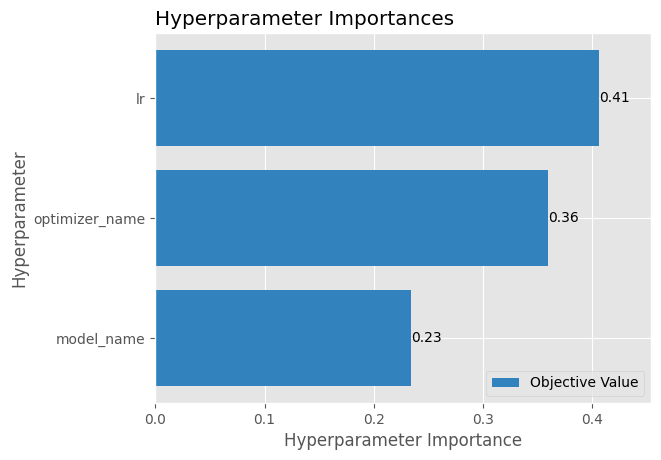

In [4]:
import sklearn
import optuna
optuna.visualization.matplotlib.plot_param_importances(study)

Trazar el historial de optimización de todos los ensayos de un estudio:

/tmp/ipykernel_1420446/1455980257.py:1: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

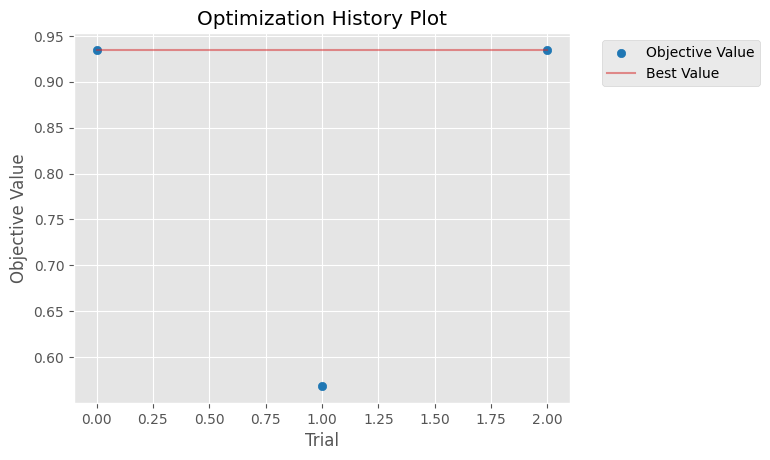

In [5]:
optuna.visualization.matplotlib.plot_optimization_history(study)

Curvas de aprendizaje de los ensayos:

/tmp/ipykernel_1420446/2140463885.py:1: ExperimentalWarning:

plot_intermediate_values is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Intermediate Values Plot'}, xlabel='Step', ylabel='Intermediate Value'>

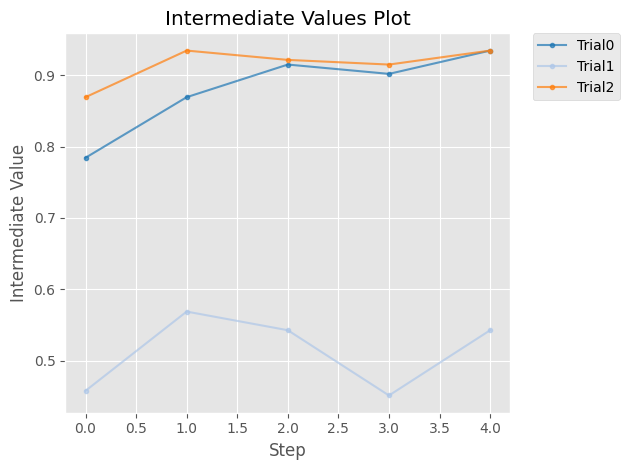

In [7]:
optuna.visualization.matplotlib.plot_intermediate_values(study)

## 7. Automatización y escalabilidad del proceso de optimización (opcional):

a. Desarrollar un framework automatizado que pueda escalar la optimización de hiperparámetros a múltiples máquinas o GPUs. \\
b. Utilizar Optuna en un entorno de com putación distribuida para manejar grandes volúmenes de pruebas de hiperparámetros de manera eficiente.

## 8. Documentación de resultados:

a. Preparar una documentación que describa los métodos utilizados, los resultados obtenidos y las recomendaciones para futuras investigaciones. \\
b. Publicar los hallazgos en un artículo de conferencia o revista, enfocándose en cómo la optimización de hiperparámetros puede mejorar significativamente los modelos de aprendizaje profundo (opcional).